# Operador Nabla. Campos conservativos

In [1]:
import time
print(' Última execución ', time.asctime() )

 Última execución  Tue Apr  9 15:58:18 2024



### Obxectivos

 Introdución do operador nabla, o gradiente, a rotación e a diverxencia dun campo.

 Interpretación da rotación e da diverxencia.

 Relacións entre eles.


*Nota*

Para que este notebook funcione en colab, precisamos <a href = "https://www.dropbox.com/scl/fi/wwz2w43kqj0s38gm87roj/graph_utils.py?rlkey=rppkwu9tmbnnsojezzj69p1r0&dl=1"> graph_utils.py</a>. Podes descargalo premendo na ligazón, e subilo a colab:


<img src="https://www.dropbox.com/scl/fi/b35vcated0f9lwrw4jy01/colab_upload.jpg?rlkey=l1ag15r0ovkg2dsefze117k1y&raw=1" width=200 align="center" />

In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'

### Operador nabla.

Definimos o operador nabla:

$$
\nabla = \left( \frac{\partial }{ \partial x}, \frac{\partial }{ \partial y}, \frac{\partial }{\partial z} \right)
$$

que pode actuar sobre campos escalares, $f(x, y, z)$, dando lugar ao **gradiente** , $\nabla f(x, y, z)$:

$$
\nabla f(x, y, z) = \left( \frac{\partial f}{ \partial x}, \frac{\partial f}{ \partial y}, \frac{\partial f}{\partial z} \right)
$$

E no gradiente, dando lugar ao **Laplaciano** , $\nabla^2$:

$$
\nabla (\nabla f) = \nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} + \frac{\partial^2 f}{\partial z^2}
$$

ou en campos vectoriais, ${\bf F}(x, y, z) = \left(F_x, F_y, F_z \right)$, o que orixina a **diverxencia** :

$$
\nabla \cdot {\bf F} = \frac{\partial F_x}{\partial x } +\frac{\partial F_y}{\partial y} + \frac{\partial F_z }{\partial z } 
$$

 e ao **rotacional** :

$$
\nabla \times {\bf F} = \left| \begin{array}{ccc} {\bf i} & {\bf j} & {\bf k} \\
\frac{\partial}{ \partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z} \\
F_x & F_y & F_z \\
 \end{array} \right| \\
 = \left(\frac{\partial F_z}{\partial y} - \frac{\partial F_y}{\partial z}, \,  \frac{\partial F_x}{\partial z} - \frac{\partial F_z}{\partial x}, \, \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y}\right) 
$$



*Exercicio* : Calcula a curvatura e a diverxencia dos seguintes campos vectoriais: ${\bf F_1}(x, y) = (\pm x, \pm y)$ e ${\bf F_2}(x, y) = ( \pm y, \pm x)$.

$\nabla \cdot {\bf F_1} = 2$ signo +.

$\nabla \cdot {\bf F_1} = -2$  signo -.

$ \nabla \cdot {\bf F_2} =  0 $ para os dous signos.

*Pregunta* : Considera agora o campo ${\bf F}(x, y) = (xy, x+y) /2$.

**Teorema** : Sexa $f(x, y, z)$ un campo escalar con derivadas segundas continuas, cúmprese: $\nabla \times \nabla f = 0$. O rotacional dun gradiente é cero.

$$
\nabla \times \nabla f  = \left| 
\begin{array}{ccc} {\bf i} & {\bf j} & {\bf k} \\
\frac{\partial}{ \partial x} &  \frac{\partial}{\partial y} & \frac{\partial}{\partial z}  \\
\frac{\partial f}{ \partial x} & \frac{\partial f}{\partial y} & \frac{\partial f}{\partial z} 
\end{array} \right| 
$$

$$
 = \left( 
\left(\frac{\partial^2 f}{\partial y\partial z} - \frac{\partial^2 f}{\partial z \partial y}\right), \;
\left(\frac{\partial^2 f}{\partial z\partial x} - \frac{\partial^2 f}{\partial x \partial z}\right),  \;
\left(\frac{\partial^2 f}{\partial x\partial y} - \frac{\partial^2 f}{\partial y \partial x}\right) 
\right)
$$

 Dado que as segundas derivadas son continuas, as segundas derivadas cruzadas son iguais (Teorema de Schwarz) e, polo tanto:

$$
\nabla \times \nabla f = 0
$$



*Exemplo:* sexa $f(x, y) = x^2 + y^2$. O seu gradiente é $\nabla f (x, y) = (2x, 2y)$, que ten rotacional cero.


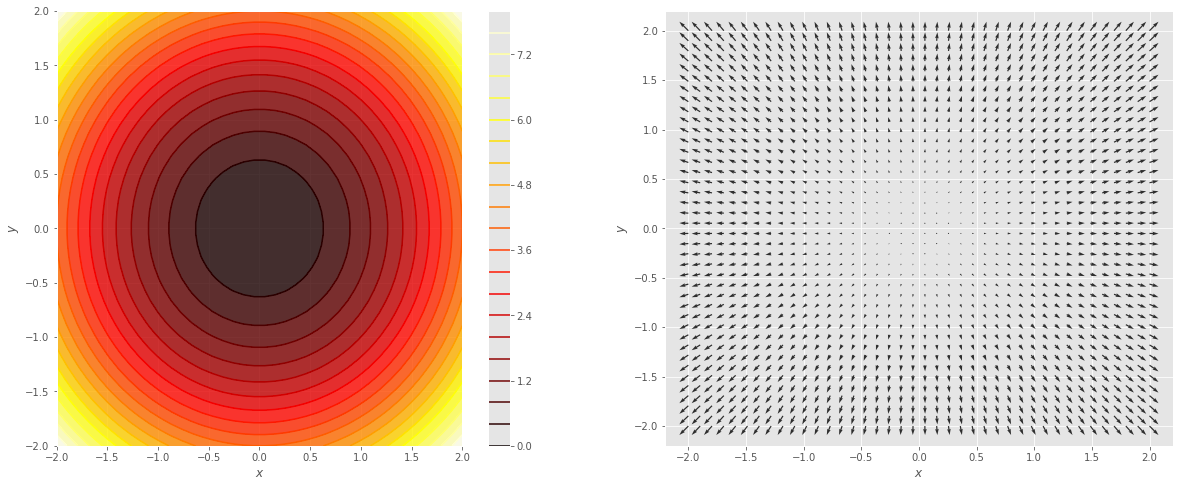

In [3]:
xrange = (-2., 2., 40)
fc = lambda x, y: x**2 + y**2
Ex = lambda x, y:  2*x
Ey = lambda x, y:  2*y
# Create a figure and a set of subplots side by side
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(1, 2, 1) # 
gf.contour (fc, xrange, xrange,newfig=False)
ax2 = fig.add_subplot(1, 2, 2) # 
gf.quiver2d(Ex, Ey, xrange, xrange,newfig=False);


*Pregunta* : Demostrar que se as funcións compoñentes do campo vectorial, ${\bf F}(x, y, z) = (F_x, F_y, F_z)$ teñen derivadas segundas continuas, acontece que: $\nabla \cdot (\nabla \times {\bf F}) = 0$, a diverxencia do rotacional é cero.



*Teorema* : Sexan $f,g$ campos escalares, ${\bf F},{\bf G}$ campos vectoriais, con segundas derivadas continuas, e $c$ unha constante;

 $\nabla (f+g) = \nabla f + \nabla g$

 $\nabla (cf) = c \, \nabla f $

 $\nabla (fg) = (\nabla f) g + f (\nabla g)$

 $\nabla (f/g) = (\nabla f)g - f(\nabla g)/g^2$

 $\nabla ({\bf F}+{\bf G}) = \nabla {\bf F} + \nabla {\bf G}$



$\nabla \times ({\bf F}+{\bf G}) = \nabla \times {\bf F}  + \nabla \times {\bf G}$

$\nabla (f {\bf F}) = f (\nabla {\bf F}) + (\nabla f) {\bf F}$ 

$\nabla ({\bf F} \times {\bf G}) = {\bf G} \, (\nabla \times {\bf F})  - {\bf F} \, (\nabla \times {\bf G})$

$\nabla ( \nabla \times {\bf F}) = 0$

$\nabla \times (f {\bf F}) = f \nabla \times {\bf F} + \nabla f \times {\bf F} $

$\nabla \times \nabla f = 0$

$\nabla^2 (fg) = f \nabla^2 g  + g \nabla^2 f - 2 (\nabla f) (\nabla g) $

$\nabla (\nabla f \times \nabla g) = 0$

$\nabla (f \nabla g - g \nabla f) = f \nabla^2 g - g \nabla^2 f$

### Campos conservativos

 Dicimos que un campo vectorial, ${\bf F}$, é **conservativo** se para todos os camiños que unen dous puntos do dominio, $A, \, B$, a integral do campo ao longo de cada un deles é igual ao mesmo.
 
Sexan dúas traxectorias, ${\bf c}_1, \, {\bf c}_2$, que unen $A \to B$, se o campo ${\bf F}$ é conservativo, vale:

$$
\int_{{\bf c}_1} {\bf F} \, \mathrm{d}{\bf s} = \int_{{\bf c}_2} {\bf F} \, \mathrm{d}{\bf s}
$$

Ou o que é o mesmo para calquera camiño pechado, ${\bf c}$, que comeza en $A$, chega a $B$ e volve a $A$, a integral é nula:

$$
\oint_{{\bf c}} {\bf F} \, \mathrm{d}{\bf s} = 0
$$


**Teorema**: Sexa un campo ${\bf F}(x, y)$, é conservativo se e só se:

$$
\frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} = 0
$$

Polo teorema de Green, a integral do campo ao longo dunha curva pechada satisfai:

$$
\oint_{{\bf c}} {\bf F} \, \mathrm{d}{\bf s} = \int_R \left( \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y}\right) \mathrm{d}x \mathrm{d}y
$$

Se se cumpre, 

$$
\frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} = 0,
$$

entón o campo é conservativo.

Se nalgunha bola non se cumpre

$$
\frac{\partial F_y}{\partial x} = \frac{\partial F_x}{\partial y}
$$ 

entón a integral ao longo da fronteira da bola $\oint_{{\bf c}} {\bf F}\, \mathrm{d}{\bf s} \neq 0$, e o campo non é conservativo.


**Exercicio** : Comproba que o campo ${\bf F}(x, y) = (2xy + y^3, x^2 + 3xy^2 + y^2)$ é conservativo.


$$
\frac{\partial F_x}{ \partial y} = 2x + 3y^2
$$

$$
\frac{\partial F_y}{ \partial x} = 2x + 3y^2
$$

¡É conservativo!

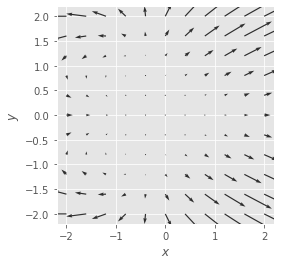

In [4]:
xrange = (-2., 2., 11)
Ey = lambda x, y: 2*x*y + y*y*y
Ex = lambda x, y:   x*x + 3*x*y*y + y*y
gf.quiver2d(Ex, Ey, xrange, xrange);
plt.gca().set_aspect('equal', 'box')


Pero é aínda podemos ir un paso máis aló:

 **Teorema** : O campo ${\bf F}(x, y) = (F_x, F_y)$ é conservativo se e só se, existe un campo escalar $U(x, y)$ tal que ${\bf F} = \nabla U$.


Se ${\bf F}$ é conservativo, entón podemos atopar $U(x, y)$. Asumamos que coñecemos ${\bf F}$. Dado que se cumpre $ F_x = \frac{\partial U}{\partial x}$, tomemos:

$$
U(x, y) = \int F_x(x, y) \, \mathrm{d}x + g(y)
$$

onde asumimos que $g(y)$ só é función de $y$. 

$F_y$ debe ser:

$$
F_y(x, y) = \frac{\partial U(x, y)}{\partial y} 
= \frac{\partial }{\partial y} \left( \int F_x(x, y) \, \mathrm{d}x + g(y) \right) \\
= \int \frac{\partial F_x(x, y) }{\partial y} \, \mathrm{d}x + \frac{\mathrm{d} g(y)}{\mathrm{d}y}  
$$

Entón:

$$
g(y) = \int_{y_0}^y \left( F_y(x, y) - \int \frac{\partial F_x(x, y)}{\partial y} \, \mathrm{d}x \right) \mathrm{d}y
$$

e comprobamos que $g(y)$ só depende de $y$:

$$
\frac{\partial g(y)}{\partial x} = \int \left( \frac{\partial F_y}{ \partial x} - \frac{\partial F_x}{\partial y}\right) \mathrm{d}y = 0
$$

dado que, por ser o campo conservativo, $\frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} = 0$.


**Exercicio** : Calcula o campo escalar, $U(x, y)$, que ten como campo conservativo ${\bf F}(x, y) = (2xy + y^3, x^2 + 3xy^2 + y^2 )$.


Tomamos:

 $$
 U(x, y) = \int (2xy + y^3) \, \mathrm{d}x + g(y) = x^2y + xy^3 + g(y)
 $$

 onde

 $$
 F_y = \frac{\partial U}{\partial y} \to x^2 + 3xy^2 + 2y = x^2 + 3xy^2 + \frac{\mathrm{d}g(y)}{\mathrm {d} y}
 $$
 
 entón:

 $$
 \frac{\mathrm{d}g(y)}{\mathrm{d}y} = 2y \to g(y) = y^2 + C
 $$

 onde $C$ é unha constante. Entón:

 $$
 U(x, y) = x^2y + xy^3 + y^2 +C
 $$


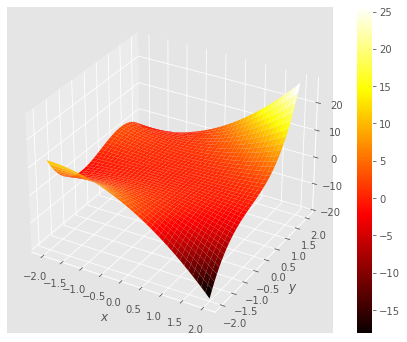

In [5]:
xrange = (-2., 2., 40)
fc = lambda x, y: y*x*x + x*y*y*y + y*y 
gf.graph(fc, xrange, xrange);


*Observa* como o seguinte campo vectorial non pode ser conservativo. Continúa dun vector a outro coma se fose un gradiente (subindo nun suposto campo escalar do que procedía)... e verás que non é posible.


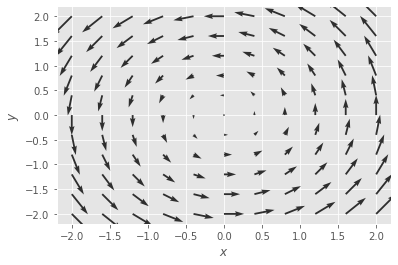

In [6]:
xrange = (-2., 2., 11)
Ey = lambda x, y:  x
Ex = lambda x, y: -y
gf.quiver2d(Ex, Ey, xrange, xrange);

Esto es, un campo convervativo proviene, o puede expresarse, como el gradiente de un campo escalar.
Si un campo no tiene rotacional es convervativo. Y si es conservativo no tiene rotacional.

Observa el dibujo de Escher ¡debe ser una ilusión óptica! porque las escaleras siguen el gradiente de su altura, y por lo tanto al circular a lo largo como la pista cerrada que forman no puede tener rotacional.

<img src="imgs/escher_stairs.jpg" width="300" />


É dicir, un campo convervativo provén de, ou pode expresarse, como o gradiente dun campo escalar.

 Se un campo non ten rotación, é convervativo. E se é conservador non ten rotación.

 Mirade o debuxo de Escher, debe ser unha ilusión óptica! porque as escaleiras seguen a pendiente da súa altura e, polo tanto, ao circular pola pista pechada que forman, non poden ser rotativas.

 &lt;img src="imgs/escher_stairs.jpg" width="300" /&gt;


**Teorema**: Sea $U(x, y)$ un campo escalar con derivadas segundas continuas, entonces la integral de su gradiente, $\nabla U$, a lo largo de una trayectoria, ${\bf c}$, que une dos puntos, $A, \, B$ es la diferencia de $U$ en $B$ y $A$.

$$
\int_{{\bf c}} \nabla U \, \mathrm{d}{\bf s} = U(B) - U(A)
$$


**Teorema** : Sexa $U(x, y)$ un campo escalar con segundas derivadas continuas, despois a integral do seu gradiente, $\nabla U$, ao longo dun camiño, ${\bf c}$, que une dous puntos, $A, \, B$ é a diferenza de $U$ en $B$ e $A$.

 $$

 \int_{{\bf c}} \nabla U \, \mathrm{d}{\bf s} = U(B) - U(A)

 $$


Sea ${\bf c}(t)$ línea parametrizada en $t \in [a, b]$, donde ${\bf c}(a) = A, \, {\bf c}(b) = B$.

$$
\int_{\bf c} \nabla U \, \mathrm{d}{\bf s} 
= \int_a^b \nabla U({\bf c}(t)) \, \dot{{\bf c}}(t) \, \mathrm{d}t 
$$

Por la regla de la cadena:

$$
= \int_a^b \frac{\mathrm{d} U({\bf c}(t))}{\mathrm{d}t} \, \mathrm{d}t = U({\bf c}(t)) \, \Big|_a^b 
= U({\bf c}(b)) - U({\bf c}(a))  \\ = U(B) - U(A)
$$


Sexa ${\bf c}(t)$ unha liña parametrizada en $t \in [a, b]$, onde ${\bf c}(a) = A, \, {\bf c}(b) = B $.

 $$

 \int_{\bf c} \nabla U \, \mathrm{d}{\bf s}

 = \int_a^b \nabla U({\bf c}(t)) \, \dot{{\bf c}}(t) \, \mathrm{d}t

 $$

 Pola regra da cadea:

 $$

 = \int_a^b \frac{\mathrm{d} U({\bf c}(t))}{\mathrm{d}t} \, \mathrm{d}t = U({\bf c}( t)) \, \Big|_a^b

 = U({\bf c}(b)) - U({\bf c}(a)) \ = U(B) - U(A)

 $$


*Ejemplo*: La altura es un campo conservativo. Da igual que camino siguas para llegar a la cumbre de una montaña, puedes seguir caminos más fáciles o más arduos, la diferencia de altura respecto de dónde empezaste siempre será la misma. 


*Exemplo* : a altura é un campo conservativo. Non importa o camiño que sigas para chegar ao alto dunha montaña, podes seguir camiños máis fáciles ou máis arduos, o desnivel con respecto a onde empezaches sempre será o mesmo.


#### ¡Aún hay más!

Muchas de estas cosas te sonarán por Física General.

El potencial eléctrico, $V$, da lugar a un campo eléctrico, ${\bf E} = - \nabla V$, que proviene del gradiente y cuyo rotacional es nulo, es por lo tanto un campo conservativo. La integral del campo entro dos puntos es simplemente la diferencia de potencial entre ellos.

En Física la fuerza sobre un móvil viene del gradiente de una energía potencial, ${\bf F} = - \nabla U$. De está relación se conserva la energía. Consideremos un móvil, de masa $m$, que sigue su trayectoria libre ${\bf c}(t)$ en función del tiempo $t$. Su energía total es la energía cinética más la potencial:

$$
E(t) = \frac{1}{2} m \dot{{\bf c}}^2(t) + U({\bf c}(t))
$$

Si derivamos respecto at $t$, y aplicando la regla de la cadena:

$$
\frac{\mathrm{d}E}{\mathrm{d}t} = m \, \dot{{\bf c}}(t) \, \ddot{{\bf c}}(t) + \nabla U({\bf c}(t)) \, \dot{{\bf c}}(t) 
= \left[m \, \ddot{{\bf c}}(t)  + \nabla U({\bf c}(t)) \right] \, \dot{{\bf c}}(t) = 0
$$

Si se cumple

$$
{\bf F} = - \nabla U = m \ddot{{\bf c}}
$$

que es la primera ley de Newton.


#### Aínda hai máis!

 Moitas destas cousas soaránche familiares de Física Xeral.

 O potencial eléctrico, $V$, orixina un campo eléctrico, ${\bf E} = - \nabla V$, que procede do gradiente e cuxa rotación é cero, é polo tanto un campo conservativo. A integral do campo entre dous puntos é simplemente a diferenza de potencial entre eles.

 En Física a forza sobre un móbil provén do gradiente dunha enerxía potencial, ${\bf F} = - \nabla U$. A enerxía consérvase a partir desta relación. Consideremos un móbil, de masa $m$, que segue o seu camiño libre ${\bf c}(t)$ en función do tempo $t$. A súa enerxía total é a enerxía cinética máis o potencial:

 $$

 E(t) = \frac{1}{2} m \dot{{\bf c}}^2(t) + U({\bf c}(t))

 $$

 Se diferenciamos con respecto a en $t$, e aplicando a regra da cadea:

 $$

 \frac{\mathrm{d}E}{\mathrm{d}t} = m \, \dot{{\bf c}}(t) \, \ddot{{\bf c}}(t) + \ nabla U({\bf c}(t)) \, \dot{{\bf c}}(t)

 = \left[m \, \ddot{{\bf c}}(t) + \nabla U({\bf c}(t)) \right] \, \dot{{\bf c}}(t) = 0

 $$

 Se se cumpre

 $$

 {\bf F} = - \nabla U = m \ddot{{\bf c}}

 $$

 que é a primeira lei de Newton.
